# Python Intro

![Python flying](img/python.png)

In [4]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# File utili per il seminario
`mkdir Seminario_SSDC`

`cd Seminario_SSDC`

`git clone git@github.com:fvisconti/SeminarioSSDC.git`

## Warm up

In [4]:
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt, seaborn as sns
sns.set()
%matplotlib inline

Intanto facciamo il primo istogramma

In [25]:
# creo una successione di 1000 punti distribuita secondo una gaussiana
x = 10 * np.random.randn(1000)

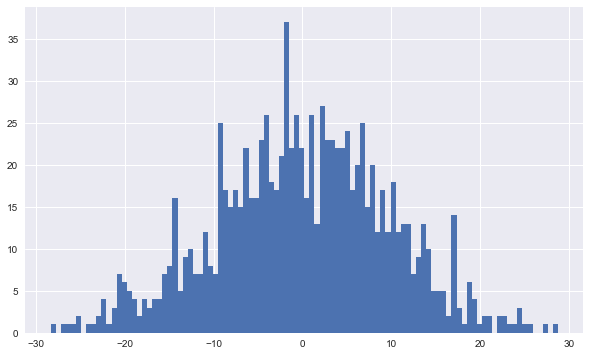

In [26]:
# istogramma di conteggi con 100 bin
fig, ax = plt.subplots(figsize=(10, 6))
hist = ax.hist(x, bins=100, normed=False, histtype='bar')

Adesso vorrei fare un fit con una gaussiana..
Prima di tutto metto i conteggi ed i bin dentro due variabili, che poi userò per la funzione che fitta

In [27]:
y, bins = np.histogram(x, bins=100, normed=False)

Problema: `bins` contiene le estremità dei bin

In [28]:
len(y), len(bins)

(100, 101)

Che posso fare? Sicuramente posso scegliere una delle due estremità come il _punto rappresentativo dei bin_ ma posso anche fare di meglio, ovvero prendere il punto di mezzo: lo facciamo a titolo di esercizio (molto istruttivo)

In [29]:
even_mean_bin_point = np.mean(bins[:-1].reshape(-1, 2), axis=1)

## Intermezzo: [numpy broadcasting](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.05-Computation-on-arrays-broadcasting.ipynb)
Andiamo a vedere (**brevemente!**) una caratteristica importante ed adorabile della libreria `numpy`.
In sintesi: combiniamo array con dimensioni differenti.
Ad esempio nell'operazione:

In [80]:
# vector + scalar
np.arange(10) + 5

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Lo scalare 5 è:
- prima _promosso_ a array mono dimensionale di lunghezza 1,
- poi, questo aray viene _allungato_ a lunghezza 10 per accoppiarsi con il primo array.

In [81]:
# 2D array     +   1D array
np.ones((3,5)) + np.arange(10,15)

array([[ 11.,  12.,  13.,  14.,  15.],
       [ 11.,  12.,  13.,  14.,  15.],
       [ 11.,  12.,  13.,  14.,  15.]])

In [83]:
np.arange(10,31,10).reshape((3,1)) + np.arange(5)

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [85]:
# quest'ultima poteva essere fatta con la funzione newaxis
X = np.arange(10, 31, 10)
Y = np.arange(5)
print(X), print(X[:, np.newaxis])
X[:, np.newaxis] + Y

[10 20 30]
[[10]
 [20]
 [30]]


array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

----------------------
Vediamo cosa produce questo metodo `reshape` 

In [30]:
bins[:-1].reshape(-1, 2)

array([[-28.31345979, -27.74299634],
       [-27.17253288, -26.60206942],
       [-26.03160597, -25.46114251],
       [-24.89067906, -24.3202156 ],
       [-23.74975215, -23.17928869],
       [-22.60882524, -22.03836178],
       [-21.46789833, -20.89743487],
       [-20.32697141, -19.75650796],
       [-19.1860445 , -18.61558105],
       [-18.04511759, -17.47465414],
       [-16.90419068, -16.33372723],
       [-15.76326377, -15.19280031],
       [-14.62233686, -14.0518734 ],
       [-13.48140995, -12.91094649],
       [-12.34048304, -11.77001958],
       [-11.19955613, -10.62909267],
       [-10.05862922,  -9.48816576],
       [ -8.9177023 ,  -8.34723885],
       [ -7.77677539,  -7.20631194],
       [ -6.63584848,  -6.06538503],
       [ -5.49492157,  -4.92445812],
       [ -4.35399466,  -3.7835312 ],
       [ -3.21306775,  -2.64260429],
       [ -2.07214084,  -1.50167738],
       [ -0.93121393,  -0.36075047],
       [  0.20971298,   0.78017644],
       [  1.35063989,   1.92110335],
 

In [31]:
odd_mean_bin_point = np.mean(bins[1:].reshape(-1, 2), axis=1)

Quindi ora concateno i due array e li ordino per avere la successione ordinata dei punti medi

In [32]:
mean_bin_point = np.sort(np.append(even_mean_bin_point, odd_mean_bin_point))

Controlliamo che l'ordinamento sia corretto

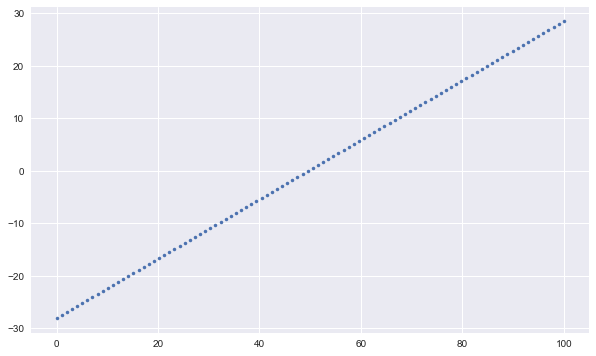

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.linspace(0, 100, 100), mean_bin_point, '.')

Ora che abbiamo i valori dei conteggi - nella variabile `y` - e le relative ascisse in `mean_bin_point`, facciamo il fit con una gaussiana e la plottiamo insieme all'istogramma.

In [23]:
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / wid)

Fittiamo i nostri dati con la gaussiana, dandogli l'_imbeccata_ di parametri iniziale

In [34]:
from scipy.optimize import curve_fit

guess = [10, 0, 1]
best_vals, pcov = curve_fit(gaussian, xdata=mean_bin_point, ydata=y, p0=guess, absolute_sigma=True)
# best_vals, pcov, np.sqrt(np.diag(pcov))

Vediamo infine i plot

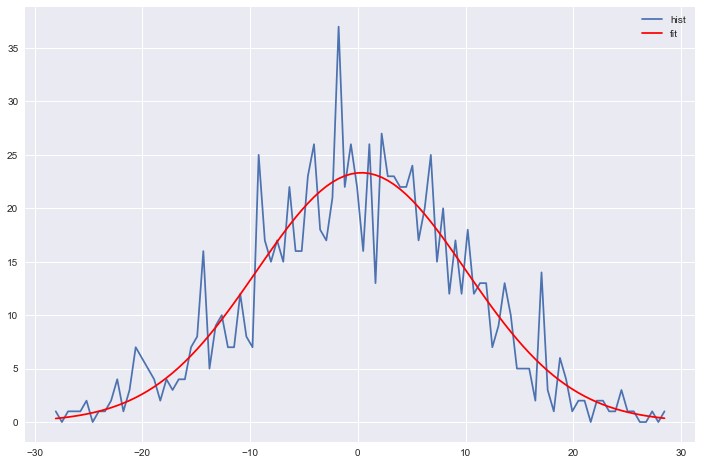

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(mean_bin_point, y, label='hist')
ax.plot(mean_bin_point, gaussian(mean_bin_point, *best_vals), 'r-', label='fit')
plt.legend(loc='best')

----------------
Cosa abbiamo visto in questo riscaldamento?
- `numpy` per la manipolazione di array
- `matplotlib` per i grafici (con seaborn come aggiunta per questioni estetiche)
- `scipy` per il fitting

## Esplorare file `.fits`

In [80]:
from astropy.io import fits
from astropy.utils.data import download_file

event_filename = download_file( 'http://data.astropy.org/tutorials/FITS-tables/chandra_events.fits', cache=True )
hdu_list = fits.open(event_filename, memmap=True)

In [90]:
hdu_list.info()

Filename: /Users/francesco/.astropy/cache/download/py3/26e9900d731d08997d99ada3973f4592
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   ['1D', '1I', '1I', '1J', '1I', '1I', '1I', '1I', '1E', '1E', '1E', '1E', '1J', '1J', '1E', '1J', '1I', '1I', '32X']   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


In [82]:
print(hdu_list[1].columns)

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'
    name = 'chipy'; format = '1I'; unit = 'pixel'
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'
    name = 'dety'; format = '1E'; unit = 'pixel'
    name = 'x'; format = '1E'; unit = 'pixel'
    name = 'y'; format = '1E'; unit = 'pixel'
    name = 'pha'; format = '1J'; unit = 'adu'; null = 0
    name = 'pha_ro'; format = '1J'; unit = 'adu'; null = 0
    name = 'energy'; format = '1E'; unit = 'eV'
    name = 'pi'; format = '1J'; unit = 'chan'; null = 0
    name = 'fltgrade'; format = '1I'
    name = 'grade'; format = '1I'
    name = 'status'; format = '32X'
)


**Astropy** mette a disposizione l'oggetto `Table` che ha una serie di formattazioni interne molto utili per guardare i dati

In [83]:
from astropy.table import Table
evt_data = Table(hdu_list[1].data)
evt_data #this shows data in a fancy table on a jupyter notebook

time,ccd_id,node_id,expno,chipx,chipy,tdetx,tdety,detx,dety,x,y,pha,pha_ro,energy,pi,fltgrade,grade,status [32]
float64,int16,int16,int32,int16,int16,int16,int16,float32,float32,float32,float32,int32,int32,float32,int32,int16,int16,bool
238623220.909,3,3,68,920,8,5124,3981,5095.64,4139.0,4168.07,5087.77,3548,3534,13874.7,951,16,4,False .. False
238623220.909,3,1,68,437,237,4895,3498,4865.57,4621.18,3662.2,4915.93,667,629,2621.19,180,64,2,False .. False
238623220.909,3,2,68,719,289,4843,3780,4814.83,4340.25,3935.22,4832.55,3033,2875,12119.0,831,8,3,False .. False
238623220.909,3,0,68,103,295,4837,3164,4807.36,4954.38,3324.46,4897.28,831,773,3253.04,223,0,0,False .. False
238623220.909,3,1,68,498,314,4818,3559,4788.99,4560.33,3713.63,4832.73,3612,3439,14214.4,974,64,2,False .. False
238623220.909,3,3,68,791,469,4663,3852,4635.45,4268.05,3985.85,4645.93,500,438,1952.72,134,0,0,False .. False
238623220.909,3,3,68,894,839,4293,3955,4266.64,4165.32,4044.55,4267.6,835,713,3267.53,224,0,0,False .. False
238623220.909,3,3,68,857,941,4191,3918,4164.81,4202.23,3995.94,4170.82,975,804,3817.04,262,0,0,False .. False
238623220.909,3,3,68,910,959,4173,3971,4146.99,4149.36,4046.34,4146.91,576,446,2252.73,155,0,0,False .. False


Di nuovo, possiamo generare grafici _esplorativi_ con una riga di comando

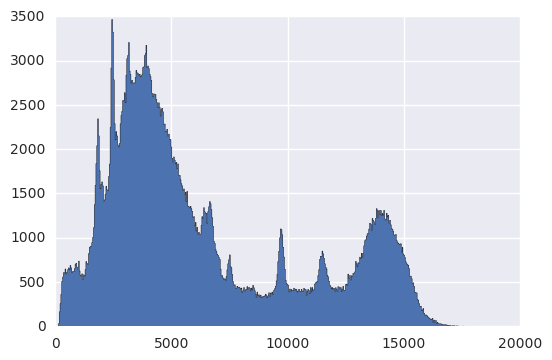

In [87]:
NBINS = 500
energy_hist = plt.hist(evt_data['energy'], NBINS, histtype='stepfilled')

### Come vedrei i dati se messi dentro un array?

In [116]:
evt_data_array = np.array(hdu_list["EVENTS"].data)

In [117]:
evt_data_array

array([ (238623220.9093583, 3, 3, 68, 920, 8, 5124, 3981, 5095.64111328125, 4138.9951171875, 4168.072265625, 5087.77197265625, 3548, 3534, 13874.71484375, 951, 16, 4, array([0, 0, 0, 0], dtype=uint8)),
       (238623220.9093583, 3, 1, 68, 437, 237, 4895, 3498, 4865.56689453125, 4621.1826171875, 3662.19677734375, 4915.93359375, 667, 629, 2621.19384765625, 180, 64, 2, array([0, 0, 0, 0], dtype=uint8)),
       (238623220.9093583, 3, 2, 68, 719, 289, 4843, 3780, 4814.8349609375, 4340.25390625, 3935.220703125, 4832.5517578125, 3033, 2875, 12119.017578125, 831, 8, 3, array([0, 0, 0, 0], dtype=uint8)),
       ...,
       (238672393.59075934, 0, 1, 15723, 406, 687, 3748, 4726, 3723.4013671875, 3396.251953125, 4762.4208984375, 3631.722412109375, 1676, 1536, 6652.8271484375, 456, 0, 0, array([0, 0, 0, 0], dtype=uint8)),
       (238672393.59075934, 0, 1, 15723, 354, 870, 3931, 4778, 3906.070068359375, 3344.77490234375, 4834.990234375, 3807.08349609375, 2436, 2165, 9672.8818359375, 663, 16, 4, arr

## Case study: energy resolution and bias

### Cosa useremo
Leggeremo un file in formato `numpy` contenente le energie ricostruite e quelle simulate di circa 4 milioni di eventi, e faremo diverse operazioni su questi dati tra cui:
- istogrammi
- scatterplot
- slicing di array attraverso maschere logiche
- fit gaussiani e plot multipli

Cominciamo.

In [1]:
# dove sono?
pwd

'/Users/francesco/WORKS/SSDC/SeminarioPython'

Vediamo brevemente le funzioni per scrivere e leggere file in `numpy`

In [6]:
# creo un array di dati
dum = np.random.randn(1000, 2)
# mostra le varie np.save

# np.load per leggere

Carico i dati veri

In [40]:
# indexes_to_keep = np.random.choice(len(en_reco), size=500000, replace=False)
# en_reco = en_reco[indexes_to_keep]
# en_true = en_true[indexes_to_keep]
# np.savez_compressed('./energiesRF', predicted=en_reco, true=en_true)
with np.load('energiesRF.npz') as en_data:
    en_reco = en_data['predicted']
    en_true = en_data['true']

en_reco.shape, en_true.shape

((500000,), (500000,))

In [41]:
print("en_reco max: {} | min: {} | #events: {}".format(np.round(en_reco.max(), 2), np.round(en_reco.min(), 2), \
                                                       len(en_reco)))
print("en_true max: {} | min: {} | #events: {}".format(np.round(en_true.max(), 2), np.round(en_true.min(), 2), \
                                                       len(en_true)))

en_reco max: 312.24 | min: 0.32 | #events: 500000
en_true max: 329.80999755859375 | min: 0.10000000149011612 | #events: 500000


Accidenti, `np.round` sembra [non funzionare](https://stackoverflow.com/questions/22261843/python-np-round-with-decimal-option-larger-than-2)..

### Distrubuzione dell'energia ricostruita

<Container object of 3 artists>

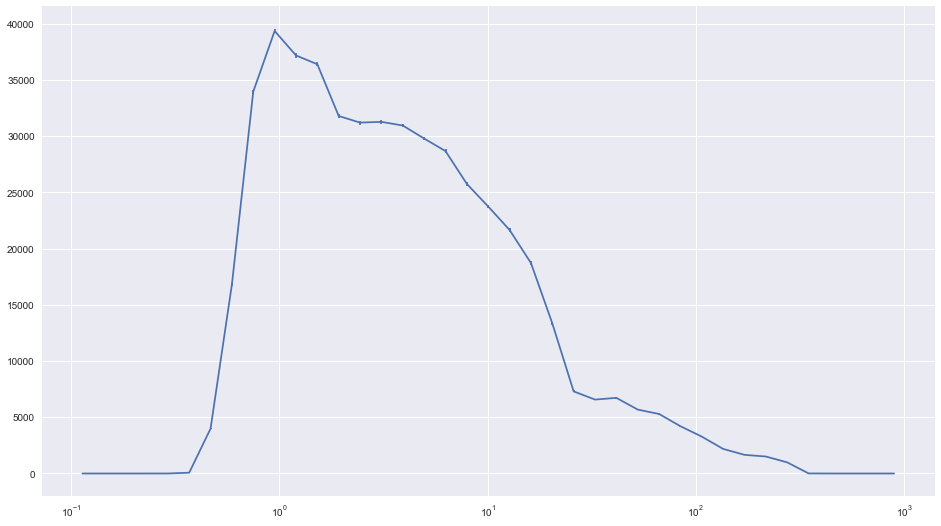

In [42]:
# Costruisco i bin di energia in scala logaritmica, 10 bin per ordine di grandezza
reco_bins = np.logspace(-1, 3, 40)
# y contiene i conteggi, x le estremità dei bin
y, x = np.histogram(en_reco, bins=reco_bins, normed=False)

# come prima, calcoliamo il punto di mezzo dei bin
# prima gli even
even_mean_bin_point = np.mean(x.reshape(-1, 2), axis=1)
# then odd,
odd_mean_bin_point = np.mean(x[1:-1].reshape(-1, 2), axis=1)
# then merge and sort
mean_bin_point = np.sort(np.append(even_mean_bin_point, odd_mean_bin_point))
# calcolo gli errori sulle energie come poissoniani
ye = np.sqrt(y)

fig, ax = plt.subplots(figsize=(16, 9))
ax.set_xscale('log')
ax.errorbar(x=mean_bin_point, y=y, yerr=ye)

### Scatter plot

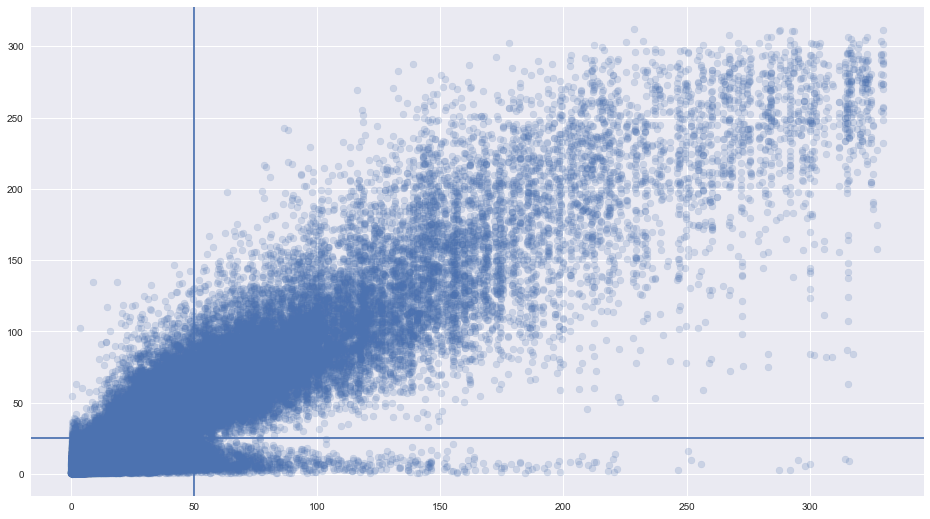

In [43]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(en_true, en_reco, cmap='plasma', alpha=0.2)
ax.axhline(25)
ax.axvline(50)

### Esercizio: contiamo quanti punti ci sono sotto le soglie disegnate nello scatter plot

In [44]:
# costruiamo una maschera logica
et50 = en_true >= 50

In [45]:
# contiamo quanti elementi sono True
np.count_nonzero(et50)

22821

In [46]:
# Selezioniamo gli elementi di en_reco che corrispondono a quegli indici di etrue
er50 = en_reco[et50]
# maschera logica per gli eventi con en_reco <= 25
mask_er50 = er50 <= 25
# contiamo!
print("numero di eventi ricostruiti molto male: {}".format(np.count_nonzero(mask_er50)))

numero di eventi ricostruiti molto male: 1339


### Costruiamo una _binned statistic_

In [18]:
tbins = np.logspace(-1, 3, 20)

#### scipy.stats.binned_statistic

In [19]:
from scipy.stats import binned_statistic
counts = binned_statistic(en_true, en_reco, statistic='count', bins=tbins)
# medians = binned_statistic(en_true, en_reco, statistic='median', bins=tbins)
counts[0]

array([   167.,   2078.,  18792.,  57477.,  72079.,  69019.,  63078.,
        53880.,  43791.,  35195.,  27570.,  20808.,  15607.,   9769.,
         5932.,   3460.,   1298.,      0.,      0.])

A mano sarebbe

In [20]:
dum = np.logical_and(en_true >= tbins[0], en_true < tbins[1])
np.count_nonzero(dum)

167

Quindi per avere i conteggi in ogni bin dovrei fare un ciclo su tutti i bin!
Poiché non mi bastano i conteggi, ma **in ogni bin voglio ricostruire la distribuzione di energia ricostruita e fittarla con una gaussiana**, faremo proprio un loop.

Definisco intanto la funzione che ritorna il valore aspettato dell'energia simulata (vera) dentro ciascun bin, pesato con la distribuzione $k E^{-\alpha}$ con $\alpha = 2.6$

In [21]:
def expected_E(E1, E2):
    alpha = 2.7
    E = ((1. - alpha) * (E2**(2. - alpha) - E1**(2. - alpha))) / \
        ((2. - alpha) * (E2**(1. - alpha) - E1**(1. - alpha)))
    return E

/usr/local/opt/anaconda3/envs/jup-lab/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/opt/anaconda3/envs/jup-lab/lib/python3.6/site-packages/numpy/lib/function_base.py:824: RuntimeWarning: invalid value encountered in true_divide
  return n/(n*db).sum(), bins


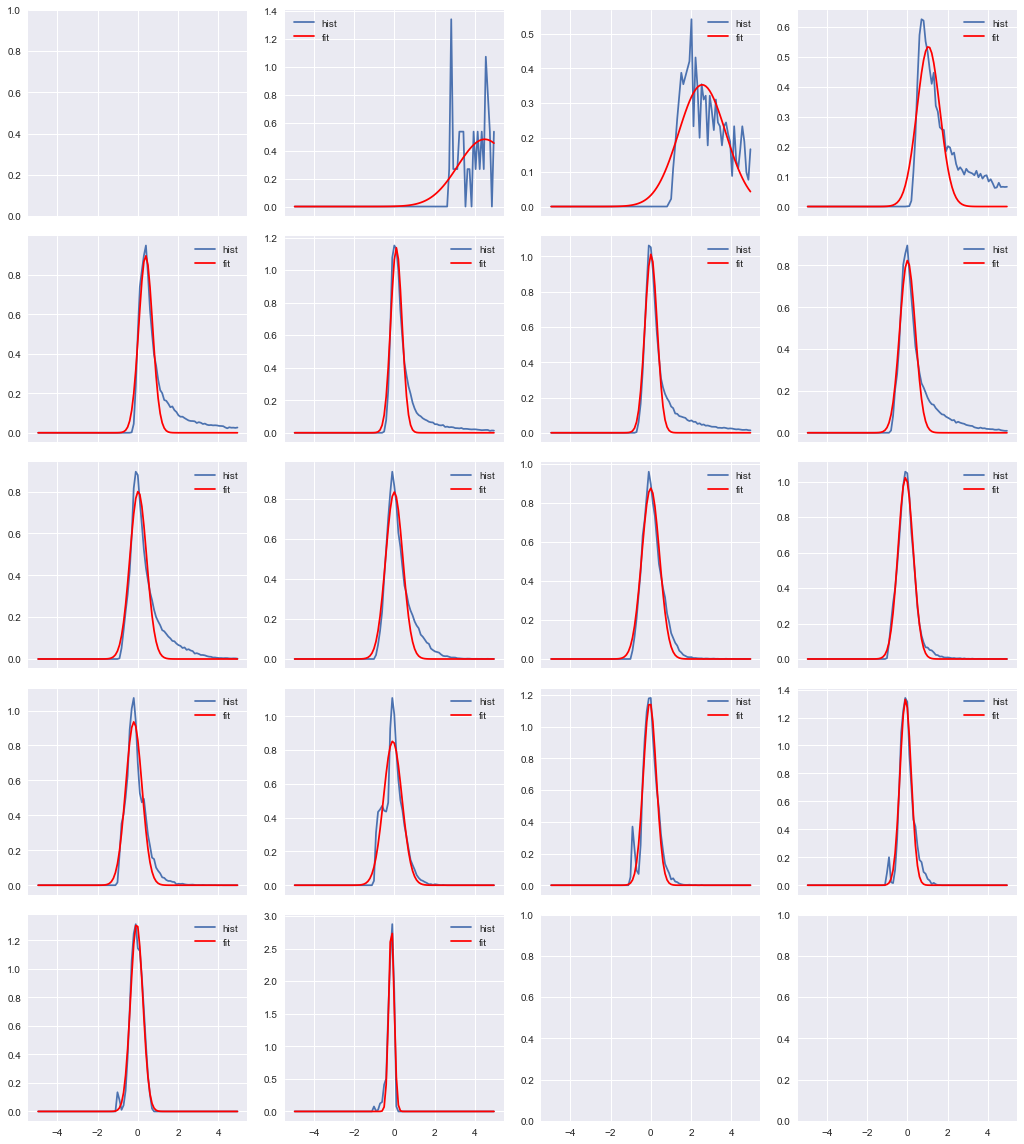

In [36]:
# funzione per il fitting da scipy.optimize
from scipy.optimize import curve_fit

# inizializzo gli array dove mettere il bias, la resolution e la root mean squared
ermean = np.zeros_like(tbins)
erstd = np.zeros_like(tbins)
rms = np.zeros_like(tbins)

# inizializzo il contenitore per i grafici
# avrò un plot per ogni bin, quindi 20: li sistemo in una griglia 5x4
fig, axn = plt.subplots(5, 4, sharex=True, figsize=(16, 16))

for i in range(1, len(tbins)):
    # select array indices that lie in this bin
    mask = np.logical_and(en_true >= tbins[i-1], en_true < tbins[i])
    # evaluate expected true value in that bin
    etmean = expected_E(tbins[i-1], tbins[i])
    # build reduced variable
    ereco_reduced = (en_reco[mask] - etmean) / etmean
    # histogram ereco in this bin
    xpdf, x = np.histogram(ereco_reduced, bins=np.linspace(-5, 5, 100), normed=True)
    # eval mid point in each bin: first eval in even intervals,
    even_mean_bin_point = np.mean(x.reshape(-1, 2), axis=1)
    # then odd,
    odd_mean_bin_point = np.mean(x[1:-1].reshape(-1, 2), axis=1)
    # then merge and sort
    mean_bin_point = np.sort(np.append(even_mean_bin_point, odd_mean_bin_point))
    # idx of max histo
    xmax = np.argmax(xpdf)

    if xmax != 0:
        # eval rms for fit's initial guess
        rms[i] = np.sqrt(np.mean(np.power((ereco_reduced - ereco_reduced[xmax]), 2)))
        # lista con i parametri iniziali da passare alla funzione che fitta
        guess = [1/np.sqrt(2*np.pi*rms[i]), ereco_reduced[xmax], 1.5*rms[i]]
        # fit
        best_vals, _ = curve_fit(gaussian, xdata=mean_bin_point, ydata=xpdf, p0=guess)
        # best_vals contiene: amp, center, wid
        ermean[i], erstd[i] = best_vals[1], best_vals[2]
        # plot: avrò 20 plot, uno per ogni bin
        ax = axn.flat[i]
        ax.plot(mean_bin_point, xpdf, label='hist')
        ax.plot(mean_bin_point, gaussian(mean_bin_point, *best_vals), 'r-', label='fit')
        ax.legend(loc='best')

fig.tight_layout(rect=[0, 0, .9, 1])

### Energy resolution and bias: il plot
Non ci rimane quindi che fare il plot del bias e della resolution

Text(0,0.5,'Energy bias and resolution')

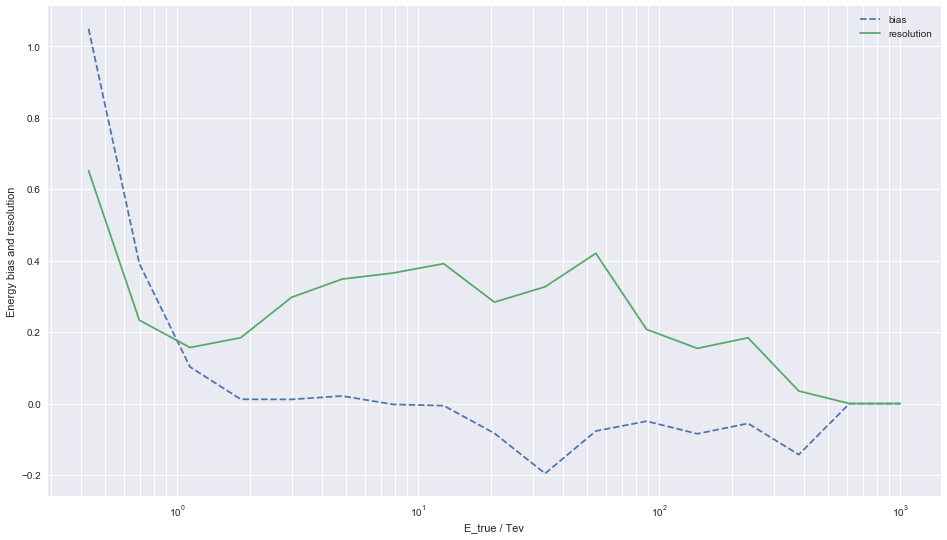

In [37]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.semilogx(tbins[3:], ermean[3:], label='bias', linestyle='--')
ax.semilogx(tbins[3:], erstd[3:], label='resolution')
ax.grid(True, which='both')
ax.legend(loc='best')
ax.set_xlabel('E_true / Tev')
ax.set_ylabel('Energy bias and resolution')

## Python benchmarks

In questa sezione vi mostro alcuni semplici benchmark di prestazioni di calcolo di `Python` contro `C`

In [73]:
# import di alcuni moduli utili
from numba import jit, vectorize, int32, float32
import ctypes
import time

Quello che farò, è comparare le prestazioni di tre versioni della stessa funzione che calcola $\pi$ in modo iterativo attraverso la funzione
$$\frac{4}{1 + x^2}$$
Definisco prima di tutto le funzioni in _puro `Python`_

In [98]:
def f(x):
    return 4. / (1. + x * x)

def compPi(niter=10000000):
    h = 1. / niter
    pi = 0.
    for i in range(niter):
        x = h * (i - 0.5)
        pi += f(x)
    error = abs(np.arccos(-1.) - pi * h) / np.arccos(-1.)
    return pi * h, error

Di seguito, la stessa funzione _accelerata_ grazie a `numba`

In [76]:
@jit(float32(float32), nogil=True)
def f_numba(x):
    return 4. / (1. + x * x)

@jit(float32(int32), nogil=True)
def compPi_numba(niter):
    h = 1. / niter
    pi = 0.
    for i in range(niter):
        x = h * (i - 0.5)
        pi += f_numba(x)
    error = abs(np.arccos(-1.) - pi * h) / np.arccos(-1.)
    return pi * h, error

Infine, nel main userò la stessa funzione implementata in `C`, compilata come `shared object` (`.so`)

In [138]:
def main():
    # import the C library
    mylib = ctypes.CDLL('./pi_c.so')
    # declare result type: default is int
    mylib.compPi_ctypes.restype = ctypes.c_double
    # declare arguments type
    pi = ctypes.c_double(0.)
    # niter = ctypes.c_int(1000)

    numIter = [1000, 10000, 100000, 1000000, 10000000]

    for i in numIter:
        print("\nn iter: {}".format(i))
        # Numba
        start = time.clock()
        compPi_numba(i)
        stop = time.clock()
        numba_time = stop - start
        print("numba function takes: {}".format(np.round(numba_time, 7)))

        # Ctype
        niter = ctypes.c_int(i)
        start = time.clock()
        mylib.compPi_ctypes(pi, niter)
        stop = time.clock()
        c_time = stop - start
        print("time for c version: {}".format(np.round(c_time, 7)))

        # Pure Python
        start = time.clock()
        compPi(i)
        stop = time.clock()
        nonumba_time = stop - start
        print("Pure Python function takes: {}".format(np.round(nonumba_time, 7)))

        with open('results_nogil.dat', 'a') as file:
            file.write(str(i) + "\t" + str(numba_time) +
                       "\t" + str(nonumba_time) +
                       "\t" + str(c_time) + "\n")

In [141]:
main()


n iter: 1000
numba function takes: 0.000124
time for c version: 0.00032
Pure Python function takes: 0.000507

n iter: 10000
numba function takes: 0.000231
time for c version: 0.000358
Pure Python function takes: 0.00651

n iter: 100000
numba function takes: 0.000892
time for c version: 0.002846
Pure Python function takes: 0.053408

n iter: 1000000
numba function takes: 0.008005
time for c version: 0.026605
Pure Python function takes: 0.523862

n iter: 10000000
numba function takes: 0.083633
time for c version: 0.264025
Pure Python function takes: 5.096051


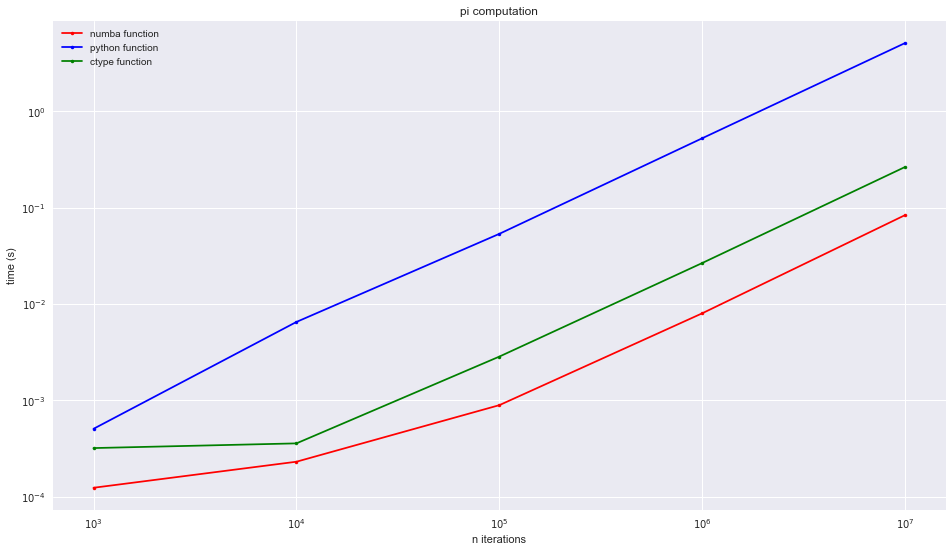

In [143]:
x, y, z, w = np.loadtxt('results_nogil.dat', delimiter='\t', unpack=True)

fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(x, y, 'r.-', label = 'numba function')
ax.plot(x, z, 'b.-', label = 'python function')
ax.plot(x, w, 'g.-', label = 'ctype function')
ax.set_ylabel('time (s)')
ax.set_xlabel('n iterations')
ax.set_xscale("log")
ax.set_yscale("log")
plt.legend(loc='best')

ax.set_title('pi computation')

## Equalizzare le entrate di due array: implementato in ctapipe
In questa sezione vediamo l'implementazione di un metodo per avere lo stesso numero di entrate in differenti array, basandosi su un binning multidimensionale.
Questo metodo è usato ad esempio per calcolare la _gamma-hadron separation_ in **CTA**, ed è attualmente presente in ctapipe qui: https://github.com/cta-observatory/ctapipe/blob/876a17fe5563dcaab65d0ee418d3a3cb73b2642c/ctapipe/reco/event_classifier.py#L157.
Per prima cosa, vediamo la funzione di hyperbinning:

In [114]:
    def _hyperBinning(x, featsToGroupBy: list):
        """
        This function is for hyper binning with pandas.
        It is intended to be used here in order to level number of events before training the classifier;
        for more general purposes, it is the Histogram in utils/fitshistogram.py to be used.

        This outputs the input array grouped in as many bins as present in the featsToGroupBy list.
        This is a list of dictionaries, each dictionary is related to a feature (array column) to be binned.

        Beware of bins generation: since np.linspace is used, if you want log bins
        you have to make log of the input array column and pass log(max and min)!

        Parameters
        ----------
        x: input array to be binned

        featsToGroupBy: list(dictionary)
              list of dictionaries (see Examples for dict keys)

        Output
        ----------
        A pandas.core.groupby.DataFrameGroupBy object


        Examples
        --------

        >>> featsToGroupBy = [{'feat': 'feat0', 'maxf': max(x[:, 0]), 'minf': min(x[:, 0]), 'col': 0, 'nbins': 10},
        ... {'feat': 'feat1', 'maxf': max(x[:, 1]), 'minf': min(x[:, 1]), 'col': 1, 'nbins': 5}]

        where

        'feat' is feature name (optional);
        'maxf' and 'minf' are the range where to bin in
        'col' is feature column number in the input array
        'nbins' is the number of requested bins
        """
        dfx = pd.DataFrame(x)
        binning_list = []

        for i in range(len(featsToGroupBy)):
            feat_dict = featsToGroupBy[i]
            bins = np.linspace(feat_dict['minf'], feat_dict['maxf'], feat_dict['nbins']+1)
            binning_list.append(pd.cut(dfx[feat_dict['col']], bins))

        groups = dfx.groupby(binning_list)

        return groups

La prima cosa da notare, è la **documentazione**: essendo un progetto condiviso, è necessario documentare in modo coerente il codice, che deve essere usato da un numero imprecisato di utenti.

Come vedete il codice in realtà è costituito da poche righe:
- si inizializza un `DataFrame pandas` ed una lista
- si fa un loop sul numero di feature su cui si vuole fare il binning
- si costruiscono i bin, ed infine si raggruppano i valori

Passiamo ora alla funzione che livella le popolazioni

In [120]:
    def level_populations(group_signal, group_bgd, signal_evts, bgd_evts):
        """Equalize number of entries in each bin.
        When doing signal - background separation, it is common to wrangle input data equalizing
        the number of entries for gammas and hadron in all the requested hyper-bins,
        before training the classifier.
        This is different from the sklearn train_test_split in the sense that this level
        the two populations based upon a previous binning over any feature requested.

        Parameters
        ----------
        group_signal: (multi dimension) histogram of signal population in pandas groups format

        group_bgd: (multi dimension) histogram of background population in pandas groups format

        signal_evts: array of signal events, to be equalized

        bgd_evts: array of background events, to be equalized


        Output
        -----------
        array of gammas and array of hadrons now of the same size

        """
        import logging
        logger = logging.getLogger('level_population')
        logging.basicConfig(level=logging.DEBUG)

        try:
            type(group_signal) is pd.core.groupby.DataFrameGroupBy
        except TypeError:
            raise TypeError("This function wants pandas DataFrameGroupBy objects as group_* inputs")
        try:
            type(group_bgd) is pd.core.groupby.DataFrameGroupBy
        except TypeError:
            raise TypeError("This function wants pandas DataFrameGroupBy objects as group_* inputs")

        # convert to pandas to use .drop()
        # dataframe names follow the original use case gamma (dfg) vs hadrons (dfh)
        dfg = pd.DataFrame(signal_evts)
        dfh = pd.DataFrame(bgd_evts)

        # have a unique set of keys in the histograms
        s = set(group_signal.indices)
        s.update(group_bgd.indices)

        for key in s:
            if key in group_signal.indices and key in group_bgd.indices:
                # count exceeding records
                exceeding = len(group_bgd.indices[key]) - len(group_signal.indices[key])

                # drop records from dataset picking exceeding number of indices
                # among those in group.indices[key]
                if exceeding > 0:
                    logger.debug('bin: {} - g: {}\th: {}\t - '
                                 'Removing {} protons'.format(key, len(group_signal.indices[key]),
                                                                   len(group_bgd.indices[key]),
                                                                   np.abs(exceeding)))
                    r_ind_list = list(np.random.choice(group_bgd.indices[key], size=exceeding, replace=False))
                    dfh.drop(r_ind_list, inplace=True)
                elif exceeding < 0:
                    logger.debug('bin: {} - g: {}\th: {}\t - '
                                 'Removing {} gammas'.format(key, len(group_signal.indices[key]),
                                                                  len(group_bgd.indices[key]),
                                                                  np.abs(exceeding)))
                    r_ind_list = list(np.random.choice(group_signal.indices[key], size=-exceeding, replace=False))
                    dfg.drop(r_ind_list, inplace=True)

            elif key in group_bgd.indices and key not in group_signal.indices:
                dfh.drop(group_bgd.indices[key], inplace=True)

            elif key in group_signal.indices and key not in group_bgd.indices:
                dfg.drop(group_signal.indices[key], inplace=True)

        return np.array(dfg), np.array(dfh)

Questa funzione fa delle cose un po' più complesse, la vediamo insieme passo passo.

In [116]:
def test_level_populations():
    g = np.array([[26, 70, 53],
                  [97, 20, 56],
                  [35, 38, 81],
                  [48, 60, 40],
                  [73, 68, 63],
                  [96, 86, 63],
                  [73, 67, 6],
                  [48, 66, 60],
                  [47, 82, 87],
                  [60, 52, 74]])

    h = np.array([[18, 31, 47],
                  [15, 81, 72],
                  [75, 93, 45],
                  [57, 50,  3],
                  [12, 80,  3],
                  [82, 49, 31],
                  [ 1, 21,  0],
                  [79, 12, 29],
                  [19, 52, 42],
                  [86, 49, 15]])

    dum_l = [{'maxf': 100, 'minf': 0, 'col': 0, 'nbins': 4},
             {'maxf': 100, 'minf': 0, 'col': 1, 'nbins': 2}]

    group_g = _hyperBinning(g, dum_l)
    group_h = _hyperBinning(h, dum_l)

    cleaned_g, cleaned_h = level_populations(group_g, group_h, g, h)

    assert cleaned_g.shape == cleaned_h.shape

In [123]:
test_level_populations()

DEBUG:level_population:bin: (Interval(50.0, 75.0, closed='right'), Interval(50.0, 100.0, closed='right')) - g: 3	h: 1	 - Removing 2 gammas
DEBUG:level_population:bin: (Interval(75.0, 100.0, closed='right'), Interval(0.0, 50.0, closed='right')) - g: 1	h: 3	 - Removing 2 protons


In [122]:
# test _hyperBinning()
x = np.array([[26, 70, 53],
              [97, 20, 56],
              [35, 38, 81],
              [48, 60, 40],
              [73, 68, 63],
              [96, 86, 63],
              [73, 67,  6],
              [48, 66, 60],
              [47, 82, 87],
              [60, 52, 74]])

dum_l = [{'maxf': max(x[:, 0]), 'minf': min(x[:, 0]), 'col': 0, 'nbins': 4},
         {'maxf': max(x[:, 1]), 'minf': min(x[:, 1]), 'col': 1, 'nbins': 2}]

dum_g = _hyperBinning(x, dum_l)

assert np.all(dum_g.size() == (1, 1, 3, 2, 1))

## Direction reconstruction
In quest'ultima sezione, a partire dai dati ottenuti con la ricostruzione della distanza attraverso le librerie `scikit-learn`, faremo:
- le distribuzioni di DISP e DIST
- $\Theta^2$ plot complessivo e per bin di energia
- Angular resolution
- Istogrammi 2D per $x$ ed $y$ ricostruite, usando come _head tail discriminator_ sia il parametro `ASYM` che `M3LONG`

Pronti: via!

In [79]:
with np.load('WorkshopPython/predicted_dir_xy-SIZE50_WORKSHOP.npz') as data:
    dir_reco = data['dir_pred']
    dir_true = data['target']
    x_src = data['x']
    y_src = data['y']

    
with np.load('WorkshopPython/predicted_xy_M3LONG-SIZE50_WORKSHOP.npz') as data:
    x_m3 = data['x']
    y_m3 = data['y']
    
    
with np.load('WorkshopPython/xy_params_SIZE50_WORKSHOP.npz') as xy:
    size = xy['size']
    leakage = xy['leakage']
    numisland = xy['numisland']
    numcore = xy['numcore']

In [49]:
dir_reco = dir_reco[indexes_to_keep]
dir_true = dir_true[indexes_to_keep]
x_src = x_src[indexes_to_keep]
y_src = y_src[indexes_to_keep]
y_m3 = y_m3[indexes_to_keep]
x_m3 = x_m3[indexes_to_keep]
size = size[indexes_to_keep]
leakage = leakage[indexes_to_keep]
numisland = numisland[indexes_to_keep]
numcore = numcore[indexes_to_keep]

np.savez_compressed('predicted_dir_xy-SIZE50_WORKSHOP', dir_pred=dir_reco, target=dir_true, x=x_src, y=y_src)
np.savez_compressed('predicted_xy_M3LONG-SIZE50_WORKSHOP', x=x_m3, y=y_m3)
np.savez_compressed('xy_params_SIZE50_WORKSHOP', size=size, leakage=leakage, numisland=numisland, numcore=numcore)

### DIST vs DISP

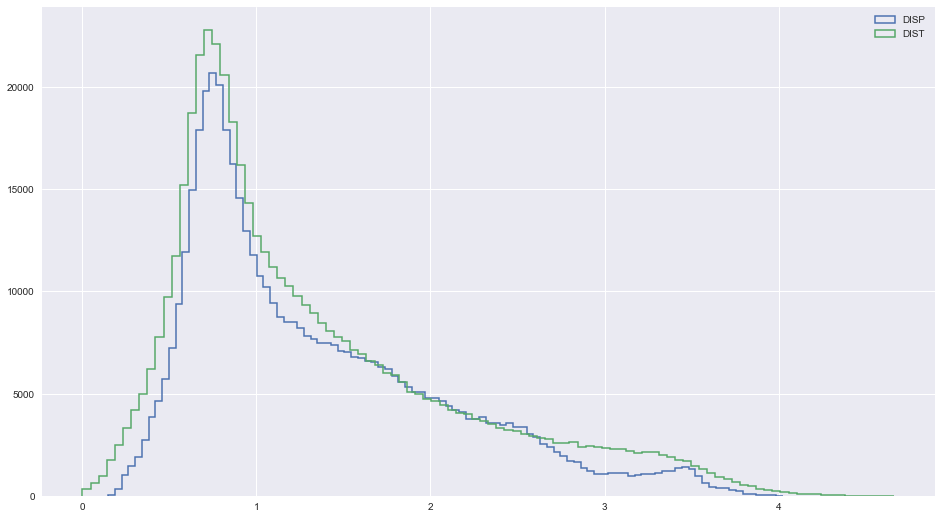

In [50]:
fig, ax = plt.subplots(figsize=(16, 9))
disp_histo = ax.hist(dir_reco, bins=100, histtype='step', label='DISP', linewidth=1.5)
dist_histo = ax.hist(dir_true, bins=100, histtype='step', label='DIST', linewidth=1.5)
ax.legend(loc='best')

Ora ci costruiamo un `DataFrame pandas` fatto così:

GAMMANESS | SIZE | en_true | en_reco | DIST | dir_reco (DISP) | x_src | y_src | LEAKAGE | NUMISLAND | NUMCORE | x_m3 | y_m3
--------- | ---- | ------- | ------- | ---- | --------------- | ----- | ----- | ------- | --------- | ------- | ---- | ----
0.9 | 8 | 120 | 110 | 7 | 9 | 0.1 | 0.2 | 0.1 | 2 | 1 | 0.2 | 0.1

I valori non sono indicativi qui.

In [63]:
# load gammaness
with np.load('WorkshopPython/gammaness_rf_WORKSHOP.npz') as data:
    gammaness = data['g']

In [64]:
df_evts = pd.DataFrame({'GAMMANESS':gammaness, 'SIZE':size, 'EN_TRUE':en_true, 'EN_RECO':en_reco, \
                       'DIST':dir_true, 'DISP':dir_reco, 'X_SRC':x_src, 'Y_SRC':y_src, \
                       'LEAKAGE':leakage, 'NUMISLAND':numisland, 'NUMCORE':numcore, 'X_M3':x_m3, 'Y_M3':y_m3})

In [65]:
# anche i dataframe pandas sono formattati molto bene nei notebook!
df_evts

,DISP,DIST,EN_RECO,EN_TRUE,GAMMANESS,LEAKAGE,NUMCORE,NUMISLAND,SIZE,X_M3,X_SRC,Y_M3,Y_SRC
0,1.287027,1.380691,2.534658,2.069959,0.78,0.000000,4,1,108.494858,0.075219,0.075219,-0.060580,-0.060580
1,2.239619,1.796139,11.294599,4.702513,0.88,0.000000,10,1,247.069427,-0.464336,-0.464336,0.014181,0.014181
2,2.902883,3.194834,27.077350,31.754183,0.93,0.000000,22,1,438.491119,4.358606,0.228263,-4.264260,-0.184163
3,1.549968,1.832540,3.835094,5.990954,0.72,0.000000,5,1,117.628685,3.372125,0.282091,-0.017196,-0.264776
4,0.958857,0.997564,1.313017,0.608945,0.89,0.000000,4,1,139.110245,0.014153,0.014153,-0.071345,-0.071345
5,1.858951,3.654115,34.090770,62.076069,0.60,0.000000,3,1,51.087231,-5.116846,-5.116846,2.044531,2.044531
6,3.195852,3.347475,125.006747,144.849579,1.00,0.061057,49,1,1766.221924,-4.948663,-0.127722,4.280824,0.084112
7,1.813866,1.774180,8.536584,2.311605,0.90,0.000000,8,1,166.480804,0.071128,-3.308697,-0.067101,-1.385138
8,0.894387,0.642080,2.279610,1.016297,0.61,0.000000,13,1,343.365295,-0.006172,-0.006172,0.266659,0.266659
9,1.019995,1.275244,2.457022,3.259992,0.24,0.000000,11,1,297.393066,-0.084437,-0.084437,0.260418,0.260418


Tagliamo in gammaness

In [66]:
df_evts_filtered = df_evts.query('GAMMANESS > 0.6')

e vediamo al volo quanti eventi abbiamo tagliato

In [67]:
len(df_evts), len(df_evts_filtered)

(500000, 414533)

Costruiamo i valori di $\theta^2$ per le coordinate ricostruite con `ASYM` e con `M3LONG`

In [68]:
theta2 = pd.Series(np.power(df_evts_filtered.X_SRC, 2) + np.power(df_evts_filtered.Y_SRC, 2))
theta2_m3 = pd.Series(np.power(df_evts_filtered.X_M3, 2) + np.power(df_evts_filtered.Y_M3, 2))

# Qui sotto assegnamo al dataframe le nuove colonne
df_evts_filtered = df_evts_filtered.assign(THETA2=theta2.values, THETA2_M3=theta2_m3.values)

Ora, per fare i $\theta^2$ plot abbiamo bisogno dei bin: scegliamo di fare bin larghi $0.02$.
Ci stampiamo quanti sono

In [69]:
# build binning: bin step = 0.02, so
print(np.round(max(df_evts_filtered.THETA2) / 0.02).astype(int),
      np.round(max(df_evts_filtered.THETA2_M3) / 0.02).astype(int))

3469 3479


e ci costruiamo i bin al solito modo

In [70]:
th2_bins = np.linspace(0, int(max(df_evts_filtered.THETA2)), np.round(max(df_evts_filtered.THETA2) / 0.02).astype(int))
th2m3_bins = np.linspace(0, int(max(df_evts_filtered.THETA2_M3)), np.round(max(df_evts_filtered.THETA2_M3) / 0.02).astype(int))

Ecco il $\theta^2$ plot totale, per `ASYM` ed `M3LONG`

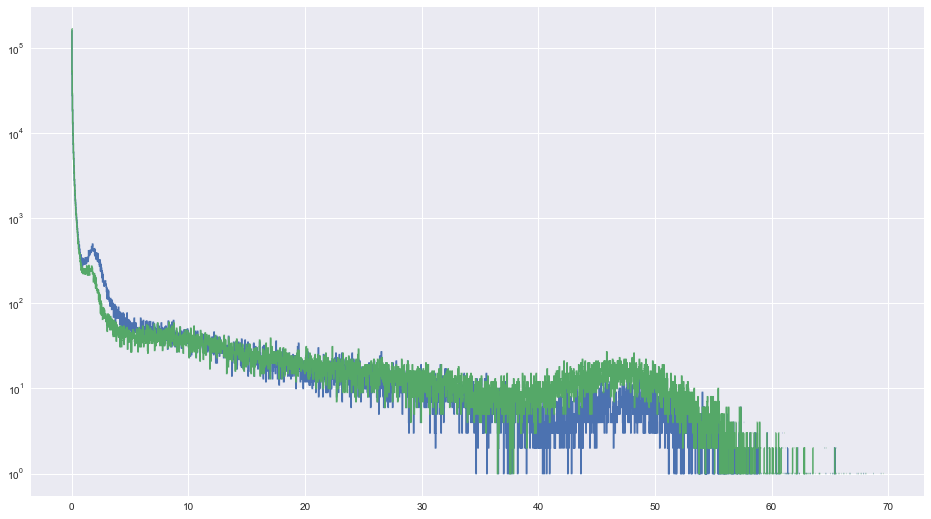

In [71]:
# Total th2 plot
fig, ax = plt.subplots(figsize=(16, 9))
# ax.set_xlim(right=5)
ax.set_yscale('log')
theta2_hist = ax.hist(df_evts_filtered.THETA2, histtype='step', linewidth=1.5,
                      bins=np.round(max(df_evts_filtered.THETA2) / 0.02).astype(int))
theta2m3_hist = ax.hist(df_evts_filtered.THETA2_M3, histtype='step', linewidth=1.5,
                        bins=np.round(max(df_evts_filtered.THETA2_M3) / 0.02).astype(int))

Ora lo vogliamo in ognni bin di energia!

In [72]:
enbins = np.logspace(-1, 3, 11)

entrue_groups = df_evts_filtered.groupby(pd.cut(df_evts_filtered.EN_TRUE, bins=enbins))

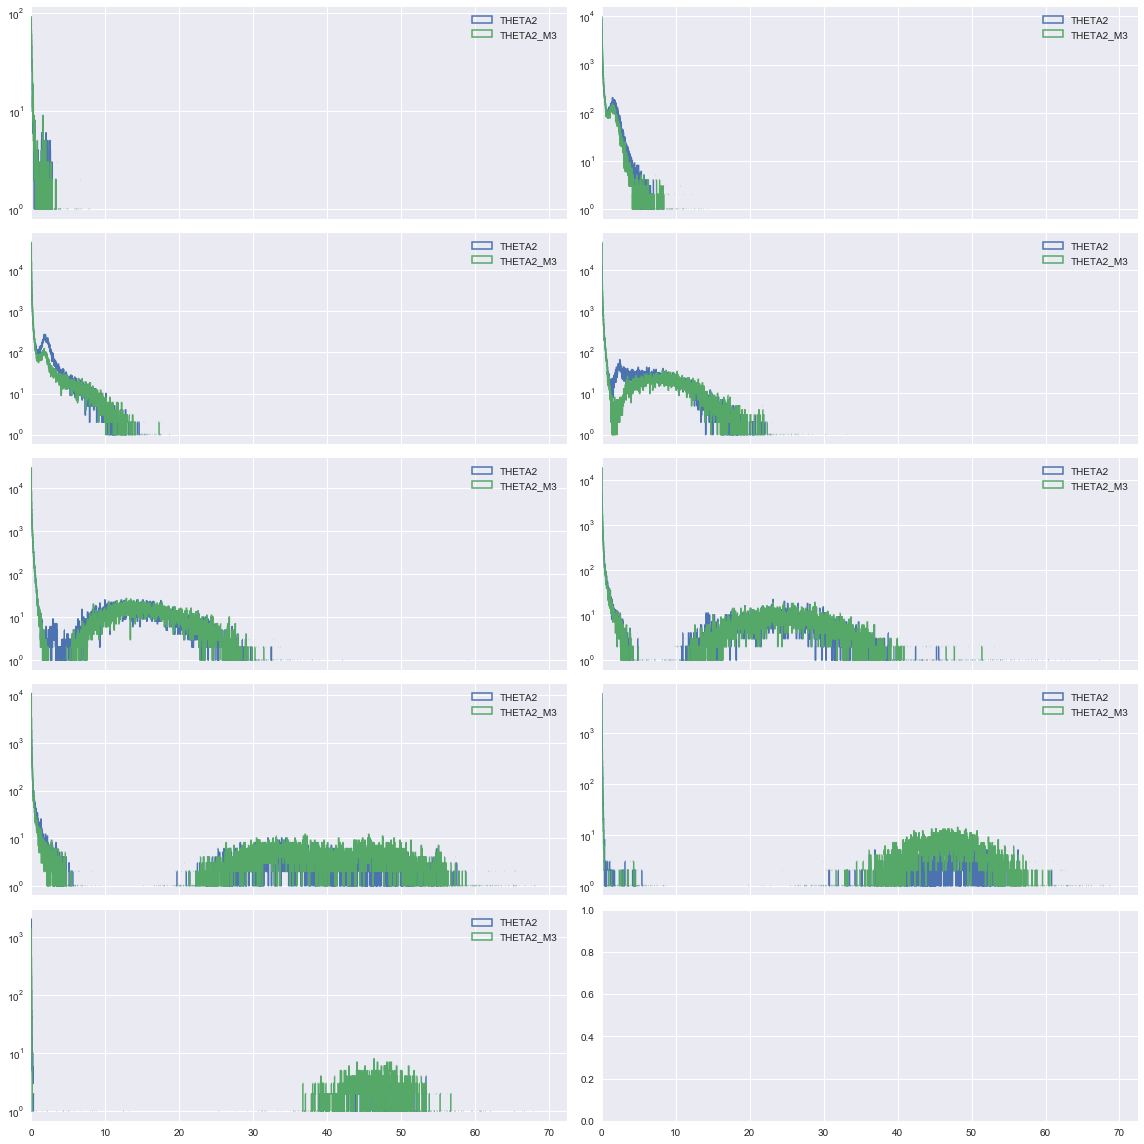

In [73]:
sigma_asym = np.zeros(entrue_groups.ngroups)
sigma_m3 = np.zeros_like(sigma_asym)

fig, axn = plt.subplots(5, 2, sharex=True, figsize=(16, 16))

for i, en_group in enumerate(entrue_groups):
    if np.any(en_group[1].THETA2) or np.any(en_group[1].THETA2_M3):
#         print(en_group[0])
        ax = axn.flat[i]
        asym_hist = ax.hist(en_group[1].THETA2, bins=th2_bins, histtype='step', linewidth=1.5)
        m3_hist = ax.hist(en_group[1].THETA2_M3, bins=th2m3_bins, histtype='step', linewidth=1.5)
    
        # for angular resolution
        csum_asym = asym_hist[0].cumsum() / asym_hist[0].sum()
        cbin_asym = np.where(csum_asym >= 0.68)[0][0]
        sigma_asym[i] = th2_bins[cbin_asym]
        csum_m3 = m3_hist[0].cumsum() / m3_hist[0].sum()
        cbin_m3 = np.where(csum_m3 >= 0.68)[0][0]
        sigma_m3[i] = th2m3_bins[cbin_m3]
    
        ax.set_yscale('log')
        ax.set_xlim(left=0)
        ax.legend(loc='upper right')
        plt.tight_layout()

Siccome sono stato abbastanza furbo da calcolare i valori di $\sigma$ nel ciclo precedente, ora posso ricavare la _angular resolution_

In [74]:
norm_sig = 0.6624305
s_asym50 = np.sqrt(sigma_asym) * norm_sig
s_m350 = np.sqrt(sigma_m3) * norm_sig
even_mean_bin_point = np.mean(enbins[:-1].reshape(-1, 2), axis=1)
# then odd,
odd_mean_bin_point = np.mean(enbins[1:].reshape(-1, 2), axis=1)
# then merge and sort
mean_bin_point50 = np.sort(np.append(even_mean_bin_point, odd_mean_bin_point))

Ed infine il plot

sigma asym 50: [ 0.61980012  0.5031811   0.22887636  0.18687677  0.20893458  0.22887636
  0.22887636  0.13214183  0.09343838  0.        ]
sigma m3long 50: [ 0.4665198   0.3232144   0.1616072   0.1616072   0.208634    0.22854709
  0.27991188  4.2980629   4.3942104   0.        ]


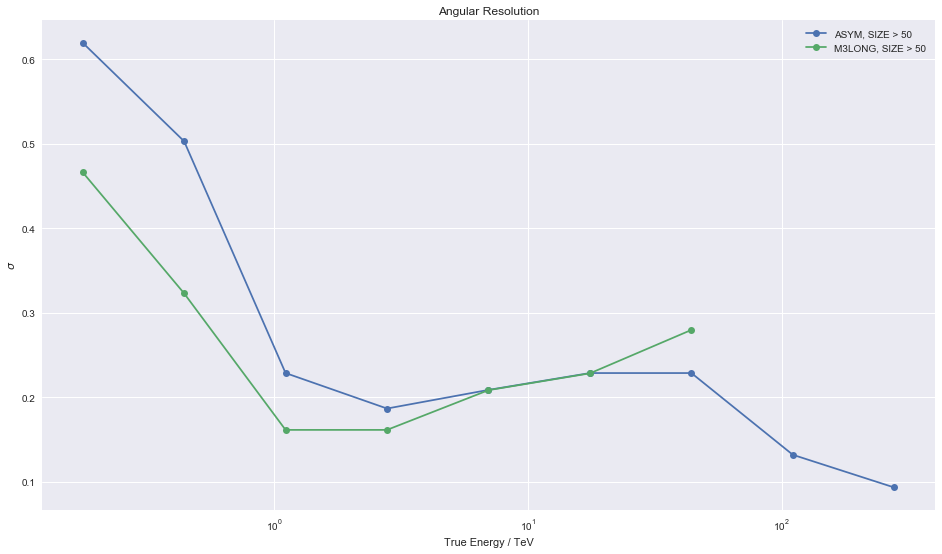

In [75]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(mean_bin_point50[:-1], s_asym50[:-1], 'o-', label="ASYM, SIZE > 50")
ax.plot(mean_bin_point50[:-3], s_m350[:-3], 'o-', label="M3LONG, SIZE > 50")


ax.set_xscale('log')
ax.legend(loc='best')
ax.set_title("Angular Resolution")
ax.set_xlabel("True Energy / TeV")
ax.set_ylabel(r'$\sigma$')
print("sigma asym 50: {}".format(s_asym50))
print("sigma m3long 50: {}".format(s_m350))

## 2D X_SRC, Y_SRC histogram
Infine i grafici più belli.
Prima i valori ottenuti usando `ASYM`

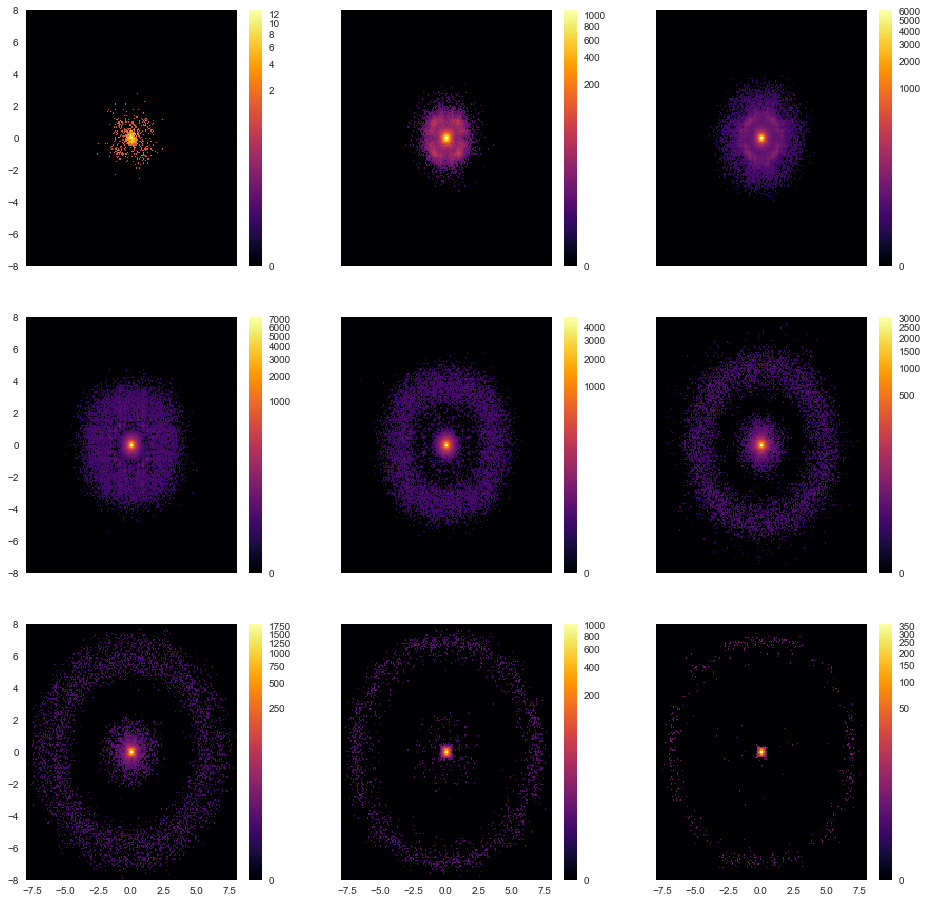

In [78]:
import matplotlib.colors as colors

fig, axn = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(16, 16))
xy_bins = np.linspace(-8, 8, 201)
sns.set_style("dark", {'grid.linewidth':0})
for i, en_group in enumerate(entrue_groups):
    if np.any(en_group[1].X_SRC):
        ax = axn.flat[i]
        _, _, _, img = ax.hist2d(en_group[1].X_SRC, en_group[1].Y_SRC, bins=xy_bins, cmap='inferno', 
                             norm=colors.PowerNorm(gamma=1/5))
        plt.colorbar(img, ax=ax)

Poi `M3LONG`

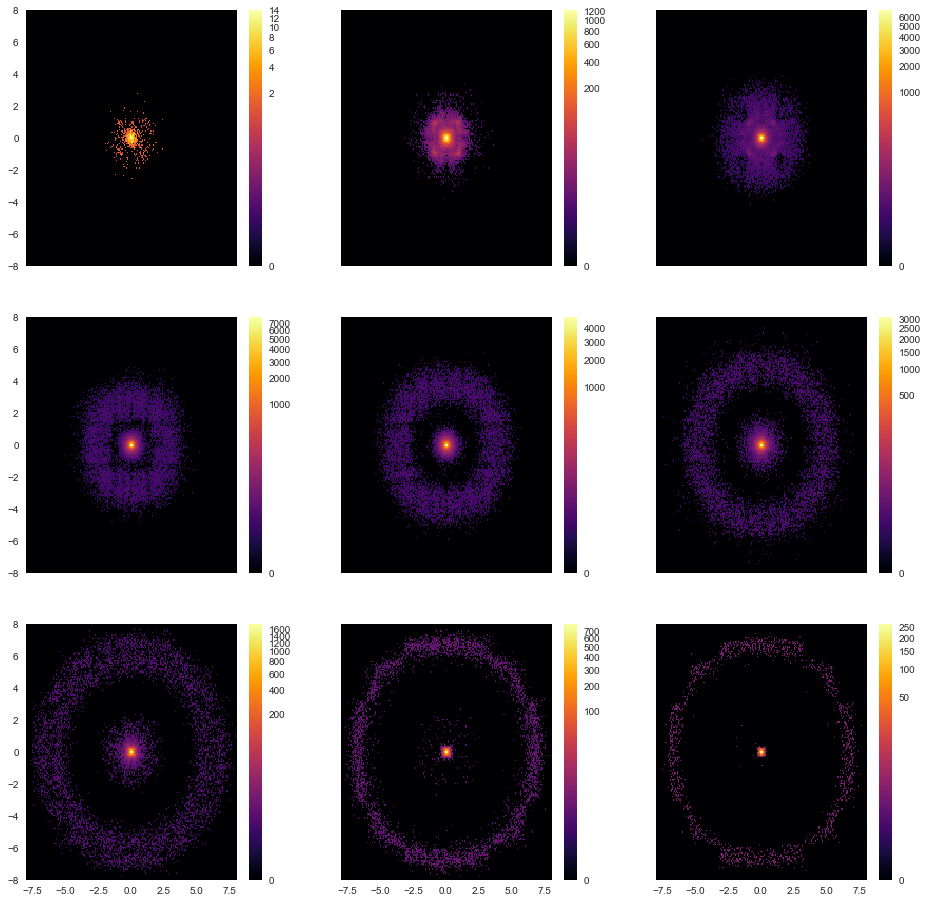

In [77]:
fig, axn = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(16, 16))
xy_bins = np.linspace(-8, 8, 201)
sns.set_style("dark", {'grid.linewidth':0})
for i, en_group in enumerate(entrue_groups):
    if np.any(en_group[1].X_M3):
        ax = axn.flat[i]
        _, _, _, img = ax.hist2d(en_group[1].X_M3, en_group[1].Y_M3, bins=xy_bins, cmap='inferno', 
                             norm=colors.PowerNorm(gamma=1/5))
        plt.colorbar(img, ax=ax)

In [56]:
from astropy.io import fits
from astropy.table import Table
hdu = fits.open('astri_001_23_003_00001_R_001400_001_0201.lv1a')
evts = Table(hdu['EVENTS'].data)
evts

GPS_ST,TIME_UT,TIME_NS,TIME_S,FLAGS,SSC,PKT_LEN,EVT_CTR,TRPDM [37],PDM01PE [64],PDM02PE [64],PDM03PE [64],PDM04PE [64],PDM05PE [64],PDM06PE [64],PDM07PE [64],PDM08PE [64],PDM09PE [64],PDM10PE [64],PDM11PE [64],PDM12PE [64],PDM13PE [64],PDM14PE [64],PDM15PE [64],PDM16PE [64],PDM17PE [64],PDM18PE [64],PDM19PE [64],PDM20PE [64],PDM21PE [64],PDM22PE [64],PDM23PE [64],PDM24PE [64],PDM25PE [64],PDM26PE [64],PDM27PE [64],PDM28PE [64],PDM29PE [64],PDM30PE [64],PDM31PE [64],PDM32PE [64],PDM33PE [64],PDM34PE [64],PDM35PE [64],PDM36PE [64],PDM37PE [64],PDM01ERR [64],PDM02ERR [64],PDM03ERR [64],PDM04ERR [64],PDM05ERR [64],PDM06ERR [64],PDM07ERR [64],PDM08ERR [64],PDM09ERR [64],PDM10ERR [64],PDM11ERR [64],PDM12ERR [64],PDM13ERR [64],PDM14ERR [64],PDM15ERR [64],PDM16ERR [64],PDM17ERR [64],PDM18ERR [64],PDM19ERR [64],PDM20ERR [64],PDM21ERR [64],PDM22ERR [64],PDM23ERR [64],PDM24ERR [64],PDM25ERR [64],PDM26ERR [64],PDM27ERR [64],PDM28ERR [64],PDM29ERR [64],PDM30ERR [64],PDM31ERR [64],PDM32ERR [64],PDM33ERR [64],PDM34ERR [64],PDM35ERR [64],PDM36ERR [64],PDM37ERR [64],EVTNUM,NTRIGTEL,MCRUNNUM
bool,str19,int32,int32,int16,int16,int16,int32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32
False,,0,0,0,1,0,4705,False .. False,nan .. 6.49838,nan .. 0.471499,nan .. 0.489171,2.93179 .. 1.28208,5.60304 .. 3.06138,4.84847 .. 2.73118,3.71433 .. 0.0751915,2.58186 .. 1.67778,nan .. 2.52303,0.181212 .. 1.92131,0.336242 .. 1.7601,5.67893 .. 3.23506,1.18155 .. 1.60723,1.56789 .. 2.2641,1.68331 .. nan,nan .. 1.25455,2.3519 .. 4.76727,0.448834 .. 3.07047,1.10308 .. 4.253,1.93222 .. 2.44425,0.859999 .. 0.878805,1.64824 .. nan,nan .. 2.7041,0.124825 .. -0.50482,-0.686461 .. 2.81721,6.51607 .. 0.321886,-0.373231 .. 1.93758,2.4571 .. 1.60381,1.46394 .. nan,4.04316 .. 5.16087,1.8078 .. 0.924589,2.8534 .. 4.49176,3.41313 .. 2.4518,6.69379 .. 5.12779,0.979285 .. nan,4.39379 .. nan,3.07846 .. nan,nan .. 3.0797,nan .. 1.99196,nan .. 1.8026,2.49612 .. 2.07507,2.98279 .. 2.54313,2.82602 .. 2.47266,2.67059 .. 1.7202,2.38212 .. 2.21581,nan .. 2.35921,1.86467 .. 2.26404,1.92708 .. 2.24319,2.92993 .. 2.53612,2.0803 .. 2.07774,2.06106 .. 2.33954,2.17672 .. nan,nan .. 2.21647,2.38561 .. 2.76231,1.85434 .. 2.39023,2.08914 .. 2.73632,2.23665 .. 2.32275,1.8819 .. 1.99849,2.17759 .. nan,nan .. 2.38064,1.80715 .. 1.70048,1.5867 .. 2.39647,3.14249 .. 1.94586,1.66433 .. 2.23291,2.3028 .. 2.19215,2.11405 .. nan,2.57131 .. 2.86178,2.24693 .. 2.05616,2.40234 .. 2.75358,2.56309 .. 2.34067,3.09245 .. 2.97208,2.03437 .. nan,2.75104 .. nan,2.47137 .. nan,4705,11,1400
False,,0,0,0,2,0,6504,False .. False,nan .. 3.70335,nan .. 3.45,nan .. 0.771902,3.32737 .. 2.63703,2.86489 .. 3.74345,2.15338 .. 2.19311,1.69582 .. 2.33538,1.58745 .. 2.79708,nan .. 3.7102,3.30364 .. 0.571515,1.02274 .. 3.11841,2.88983 .. 1.92111,0.844289 .. -0.037687,2.2784 .. 0.599121,2.62346 .. nan,nan .. 1.40091,1.3281 .. 0.0528236,3.27806 .. 4.34888,1.13512 .. 2.38332,3.60754 .. 1.8241,3.97111 .. 0.542388,1.6003 .. nan,nan .. 2.76932,5.65869 .. 0.865743,6.31498 .. 3.36189,2.85509 .. 1.3606,5.48434 .. 1.02687,-0.122065 .. -0.789536,1.51095 .. nan,-0.625071 .. 3.53147,2.7899 .. 2.0006,2.8534 .. 1.67529,5.11735 .. 2.4518,4.55241 .. 4.46684,3.03885 .. nan,0.380688 .. nan,3.55836 .. nan,nan .. 2.58641,nan .. 2.63561,nan .. 1.87938,2.57414 .. 2.37926,2.48172 .. 2.67387,2.30028 .. 2.36135,2.26132 .. 2.28458,2.16335 .. 2.45543,nan .. 2.59866,2.56894 .. 1.94321,2.09765 .. 2.527